<a href="https://colab.research.google.com/github/Conversalfall/AI/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Pandas, train test split(to train and test data with a ratio of 80 20),perceptron to fit it to the model, and accuracy to measure the accuracy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification, make_regression
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

import __main__

reading the dataset provided

In [ ]:
data = pd.read_csv('Perceptron.csv')

assigning columns of the dataset to new variables

In [ ]:
X = data.drop('y', axis=1)
y = data['y']

Training and testing the data with the ratio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=73)

Creating a Neuron

In [ ]:
X_train=np.asarray(X_train)

In [ ]:
y_train=np.array(y_train)
y_train=y_train.reshape(-1,1)
y_train.shape,X_train.shape

((320, 1), (320, 2))

Activation Fcn

In [ ]:
def relu(x):
    return np.maximum(0, x)

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
def tanh(x):
    return np.tanh(x)

Loss Fcn

In [ ]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

In [ ]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

In [ ]:
class Neuron:

    def __init__(self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            #model
            y_hat = self.predict(x)
            #loss
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            #grad
            self.gradient(x, y, y_hat)
            #optimize
            self.gradient_descent()
            #print results
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss:.4}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f'Neuron({self.in_features}, {self.af.__name__})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}

In [ ]:
neuron = Neuron(in_features=2, af=sigmoid,loss_fn=bce,n_iter=100)
neuron.fit(X_train,y_train)
neuron.parameters()

Iter=0, Loss=0.3438
Iter=10, Loss=-1.082
Iter=20, Loss=-2.014
Iter=30, Loss=-2.834
Iter=40, Loss=-3.618
Iter=50, Loss=-4.387
Iter=60, Loss=-5.149
Iter=70, Loss=-5.906
Iter=80, Loss=-6.661
Iter=90, Loss=-7.414


{'w': array([[-5.80982225],
        [-5.62538001]]),
 'b': -4.9295353504782184}

In [ ]:
neuron = Neuron(in_features=2, af=sigmoid)
neuron.predict(X)
print(neuron.predict(X_test))
print(neuron.parameters())

            0
386  0.513585
7    0.518962
358  0.924950
236  0.402504
335  0.491285
..        ...
275  0.922326
176  0.622135
55   0.430393
48   0.931184
74   0.658722

[80 rows x 1 columns]
{'w': array([[0.47067408],
       [0.71400123]]), 'b': 0.9847379765565988}


In [ ]:
neuron.fit(X_train, y_train[:])
neuron.parameters()

Iter=0, Loss=1.942
Iter=10, Loss=0.955
Iter=20, Loss=0.6019
Iter=30, Loss=0.5277
Iter=40, Loss=0.5089
Iter=50, Loss=0.5036
Iter=60, Loss=0.502
Iter=70, Loss=0.5016
Iter=80, Loss=0.5017
Iter=90, Loss=0.5019


{'w': array([[-5.41336534],
        [-5.21405989]]),
 'b': -3.979228493641862}

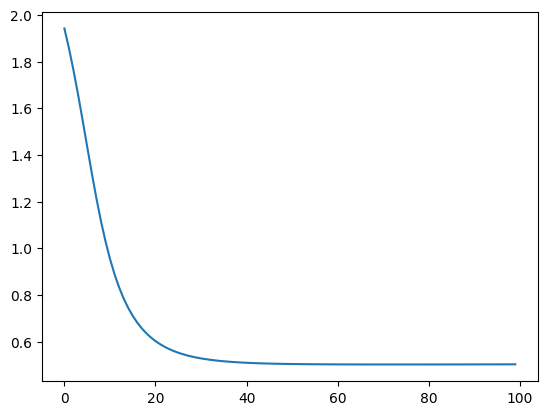

In [ ]:
plt.plot(neuron.loss_hist)